Important relations among different columns in the dataframe above:
    
#### These relations are analyzed regardless of the existing rate at the country level (everything will be examined globally)"
- distribution of suicide between different age range for males in different years 
- compare this distribution with that of women 
- how HDI (Human Development Index) can affect the suicide rate?

    `Make inference`

#### These relations are analyzed at the country level"

- which countries show more suicide rate among different genders?
    
    `Requires another CSV file to be downloaded`

- barplot for countries cmparing the rate between the youngest and oldest age range 



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### This code has been modified for you. Here is one main function named 'suicide_country_factor' whose varible is df


In [3]:

df = pd.read_csv('./master.csv')

In [5]:
def suicide_country_factor(df):
    
    country_list=np.unique(df['country'])
    year_list=list(np.unique(df['year']))

    year_list.remove(1985)
    year_list.remove(1986)
    year_list.remove(2016)
        
    pear=[]
    
    for co in country_list:
        
        df_c = df[df['country'] == co]
       
        dff_facto=[]
        dff_sui=[]
        
        for year in year_list:
            
            df_y = df_c[df_c['year'] == year]
            df_y_s=list(df_y['suicides_no'])
            n=sum(df_y_s)
            
            dff_sui.append(n)
            
            df_y_f=list(df_y['population'])
            df_y_f_int=[]
            
            df_y_f_int=df_y_f
                        
            nn=sum(df_y_f_int)
     
            dff_facto.append(nn)            
        
        cor=np.corrcoef(dff_sui,dff_facto)
        pear.append(cor[1][0])

    return pear

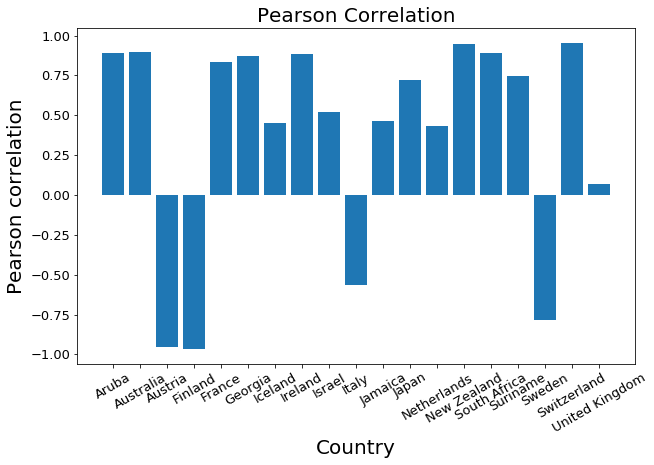

In [134]:
pear=suicide_pearson_population(df)
fig = plt.figure(figsize=(10,6.18))

p_c_list=np.array(list(country_list[4:7])+list(country_list[32:35])+list(country_list[41:47])+list(country_list[61:63])+list(country_list[85:86])+list(country_list[88:91])
                  +list(country_list[97:98]))
p_p=np.array(list(pear[4:7])+list(pear[32:35])+list(pear[41:47])+list(pear[61:63])+list(pear[85:86])+list(pear[88:91])+list(pear[97:98]))


plt.bar(p_c_list,p_p)
plt.ylabel('Pearson correlation',fontsize='20')
plt.xlabel("Country",fontsize='20')

plt.xticks(rotation=30,fontsize="100");
plt.yticks(fontsize="160");
plt.title('Pearson Correlation',fontsize='20')
plt.tick_params(labelsize=13)


Text(0, 0.5, 'num of suicide')

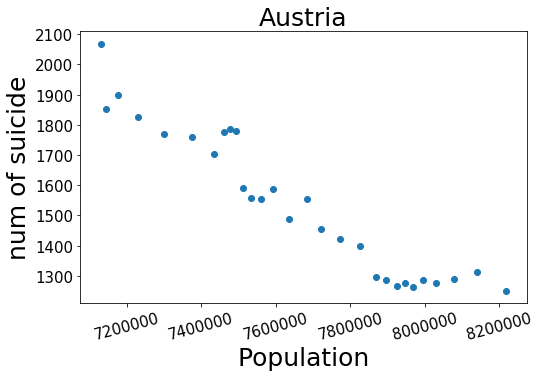

In [160]:
df_c = df[df['country'] == 'Austria']


dff_population=[]
dff_sui=[]
        
for year in year_list:
            
    df_y = df_c[df_c['year'] == year]
    df_y_s=list(df_y['suicides_no'])
    n=sum(df_y_s)
            
    dff_sui.append(n)
            
    df_y_f=list(df_y['population'])
    df_y_f_int=[]
            
   
    df_y_f_int=df_y_f
            
            
    nn=sum(df_y_f_int)
           
    dff_population.append(nn)       
            
fig = plt.figure(figsize=(8,5))

plt.scatter(dff_population,dff_sui)
plt.title('Austria',Fontsize=25)
plt.tick_params(labelsize=15)   
plt.xticks(rotation=15);
plt.xlabel('Population',Fontsize=25)
plt.ylabel('num of suicide',Fontsize=25)


Text(0, 0.5, 'num of suicide')

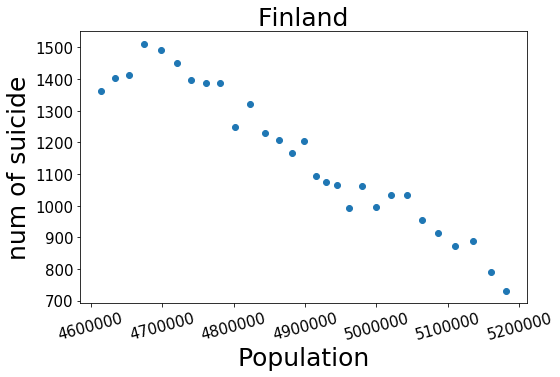

In [159]:
df_c = df[df['country'] == 'Finland']


dff_population=[]
dff_sui=[]
        
for year in year_list:
            
    df_y = df_c[df_c['year'] == year]
    df_y_s=list(df_y['suicides_no'])
    n=sum(df_y_s)
            
    dff_sui.append(n)
            
    df_y_f=list(df_y['population'])
    df_y_f_int=[]
            
   
    df_y_f_int=df_y_f
            
            
    nn=sum(df_y_f_int)
           
    dff_population.append(nn)       
            
fig = plt.figure(figsize=(8,5))

plt.scatter(dff_population,dff_sui)
plt.title('Finland',Fontsize=25)
plt.tick_params(labelsize=15)   
plt.xticks(rotation=15);
plt.xlabel('Population',Fontsize=25)
plt.ylabel('num of suicide',Fontsize=25)


Text(0, 0.5, 'num of suicide')

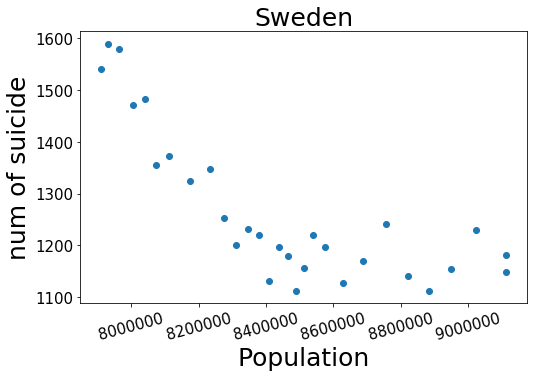

In [158]:
df_c = df[df['country'] == 'Sweden']


dff_population=[]
dff_sui=[]
        
for year in year_list:
            
    df_y = df_c[df_c['year'] == year]
    df_y_s=list(df_y['suicides_no'])
    n=sum(df_y_s)
            
    dff_sui.append(n)
            
    df_y_f=list(df_y['population'])
    df_y_f_int=[]
            
   
    df_y_f_int=df_y_f
            
            
    nn=sum(df_y_f_int)
           
    dff_population.append(nn)       
            
fig = plt.figure(figsize=(8,5))

plt.scatter(dff_population,dff_sui)
plt.title('Sweden',Fontsize=25)
plt.tick_params(labelsize=15)   
plt.xticks(rotation=15);
plt.xlabel('Population',Fontsize=25)
plt.ylabel('num of suicide',Fontsize=25)


Text(0, 0.5, 'num of suicide')

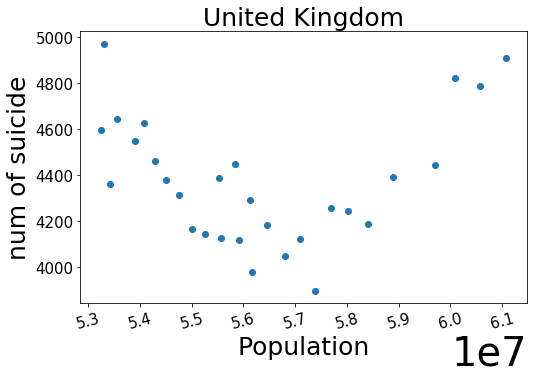

In [157]:
df_c = df[df['country'] == 'United Kingdom']


dff_population=[]
dff_sui=[]
        
for year in year_list:
            
    df_y = df_c[df_c['year'] == year]
    df_y_s=list(df_y['suicides_no'])
    n=sum(df_y_s)
            
    dff_sui.append(n)
            
    df_y_f=list(df_y['population'])
    df_y_f_int=[]
            
   
    df_y_f_int=df_y_f
            
            
    nn=sum(df_y_f_int)
           
    dff_population.append(nn)       
            
fig = plt.figure(figsize=(8,5))

plt.scatter(dff_population,dff_sui)
plt.title('United Kingdom',Fontsize=25)
plt.tick_params(labelsize=15)   
plt.xticks(rotation=15);
plt.xlabel('Population',Fontsize=25)
plt.ylabel('num of suicide',Fontsize=25)


Text(0, 0.5, 'num of suicide')

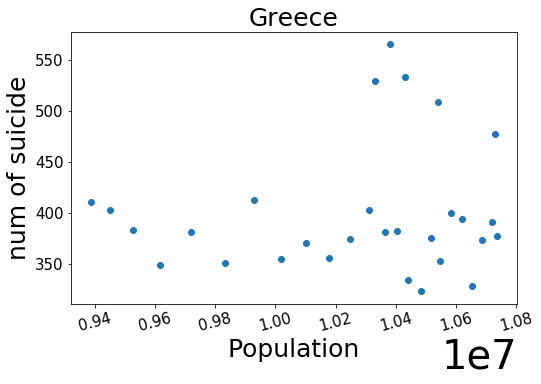

In [156]:
df_c = df[df['country'] == 'Greece']


dff_population=[]
dff_sui=[]
        
for year in year_list:
            
    df_y = df_c[df_c['year'] == year]
    df_y_s=list(df_y['suicides_no'])
    n=sum(df_y_s)
            
    dff_sui.append(n)
            
    df_y_f=list(df_y['population'])
    df_y_f_int=[]
            
   
    df_y_f_int=df_y_f
            
            
    nn=sum(df_y_f_int)
           
    dff_population.append(nn)       
            
fig = plt.figure(figsize=(8,5))

plt.scatter(dff_population,dff_sui)
plt.title('Greece',Fontsize=25)
plt.tick_params(labelsize=15)   
plt.xticks(rotation=15);
plt.xlabel('Population',Fontsize=25)
plt.ylabel('num of suicide',Fontsize=25)
